<h1> BPC-BIN: 10. cvičení - Numerické reprezentace </h1>

## <u>Numerické reprezentace</u>

* převod genomické nebo proteomické sekvence do číselného formátu podle numerické mapy
* 1D signál = sekvence NT či AA
* numerická mapa
  * způsob převedení znakových dat do číselných dat
  * volba mapy závisí na typu analýzy, kterou chceme provést
  * může omezit informační obsah nebo zvýraznit některé vlastnosti sekvencí  




## <u>Biochemické vlastnosti DNA sekvencí</u><br>

* molekulární struktura
    * puriny (R) x pyrimidiny (Y)
* síla komplementární vazby
    * slabá (W) x silná (S) vazba
* obsah radikálů
    * amino (M) x keto (K) skupina


## <u>Nukletidový čtyřstěn</u>
* odvození numerických map bez ztráty informace o biochemických vlastnostech
* vrcholy - nukleotidy
* hrany - biochemické vlastnosti
* střed kartézského souřadného systému je uprostřed čtyřstěnu a pokud je vzdálenost k libovolné stěně rovna 1, pak vrcholy mají souřadnice:
  * A = (1, 1, 1)
  * C = (-1, 1, -1)
  * G = (-1, -1, 1)
  * T = (1, -1, -1)


![](https://drive.google.com/uc?export=view&id=1wzKNGsVx3MBsbsxpidRx7cdJxqDDtcwo)



## <u>4D binární</u><br>

* reprezentace indikačními vektory
* bez informace o biochemických vlastnostech
* pouze informace o výskytu nukleotidu na pozici v sekvenci
* příklad:
    ATGAATCA 

    uA = [1 0 0 1 1 0 0 1] </br>
uC = [0 0 0 0 0 0 1 0] </br>
uG = [0 0 1 0 0 0 0 0] </br>
uT = [0 1 0 0 0 1 0 0] </br>


## <u>Binární reprezentace</u><br>

* pouze číslice 0 a 1 pro reprezentaci biochemických vlastností
* 3 bity:
  * R/Y = 0/1, S/W = 0/1, M/K = 0/1
  * A = 010, C = 100, G = 001, T = 111
* lze redukovat na 2 bity:
  * R/Y = 0/1, S/W = 0/1
  * A = 01, C = 10, G = 00, T = 11

* příklad:
    ATGAATCA 

    3 bity: 010111001010010111100010 </br>
2 bity: 0111000101111001

## <u> 1. a 4. kvadrant</u><br>

* nukleotidy jsou mapovány jednotkovými vektory v 1. a 4. kvadrantu kartézského souřadného systému
* vrcholy mají souřadnice: </br>
A =(1/2 , -√3/2)</br>
C = (√3/2, 1/2)</br>
G = (√3/2, -1/2)</br>
T = (1/2, √3/2)</br>

* možnost kumulace signálu - vhodné ke grafickému zobrazení bez degenerace (viz grafická reprezentace sekvence AGCATTGCAT vpravo)

![](https://drive.google.com/uc?export=view&id=1rVS9avGnQJbnlHp4e-Qd4FQt5KMnKL8t)

![](https://drive.google.com/uc?export=view&id=1zwuS9rO-8eI6NbJ1YvyQVsh29smQI4aE)

In [ ]:
pip install biopython

## <u>Úkol 1:</u> <br>

Vytvořte funkci *nt2bin*, která převede nukleotidovou sekvenci do 4D binárních sekvencí.

* vstup funkce - nukleotidová sekvence
* výstup funkce - pole indikačních vektorů

Ukázka volání funkce:
```
nt2bin('TGCAATCGTC')
```
Ukázka výstupu:
```
array([[0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 0.]])
```






In [ ]:
## místo pro Váš kód
import numpy as np

def nt2bin(sequence):
  #matice
  m = 4
  n = len(sequence)
  M = np.zeros((m, n))

  #prochazeni sekvence
  for i in range (n):
    if sequence[i] == 'A':
      M[0,i] = 1
    elif sequence[i] == 'C':
      M[1,i] = 1
    elif sequence[i] == 'G':
      M[2,i] = 1
    elif sequence[i] == 'T':
      M[3,i] = 1
  
  return(M)

nt2bin('TGCAATCGTC')

array([[0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 0.]])

## <u>Úkol 2:</u> <br>

Vytvořte funkci *nt2bin2*, která převede nukleotidovou sekvenci do dvou bitové reprezentace.

* vstup funkce - nukleotidová sekvence
* výstup funkce - list obsahující dvou bitové reprezentace

Ukázka volání funkce:
```
nt2bin2('TGCAATCGTC')
```
Ukázka výstupu:
```
[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0]
```



In [ ]:
## místo pro Váš kód
def nt2bin2(sequence):
  V = []
  for i in range (len(sequence)):
    if sequence[i] == 'A':
      V.append(0)
      V.append(1)
    elif sequence[i] == 'T':
      V.append(1)
      V.append(1)
    elif sequence[i] == 'G':
      V.append(0)
      V.append(0)
    elif sequence[i] == 'C':
      V.append(1)
      V.append(0)
  return (V)

nt2bin2('TGCAATCGTC')



## <u>Úkol 3 - 1. část:</u> <br>

Vytvořte funkci *nt2kvad*, která převede nukleotidovou sekvenci do kumulované reprezentace pomocí 1. a 4. kvadrantu.

* vstup funkce - nukleotidová sekvence
* výstup funkce - kumulovaný signál reprezentace 1. a 4. kvadrantu

Ukázka volání funkce:
```
nt2kvad('TGCAATCGTC')
```
Ukázka výstupu:
```
([0,  0.5,  1.3660254037844386,  2.232050807568877,  2.732050807568877,  3.232050807568877,  3.732050807568877,  4.598076211353316,  5.464101615137754,  5.964101615137754,  6.830127018922193], 
[0,  0.8660254037844386,  0.3660254037844386,  0.8660254037844386,  0.0,  -0.8660254037844386,  0.0,  0.5,  0.0,  0.8660254037844386,  1.3660254037844386])
```



In [ ]:
## místo pro Váš kód
import numpy as np
import math

def nt2kvad(sequence):
  x = []
  y = []
  x_cs = []
  y_cs = []


  for i in range (len(sequence)):
    if sequence[i] == 'A':
      x.append(1/2)
      y.append(-math.sqrt(3)/2)
    elif sequence[i] == 'T':
      x.append(1/2)
      y.append(math.sqrt(3)/2)
    elif sequence[i] == 'G':
      x.append(math.sqrt(3)/2)
      y.append(-1/2)
    elif sequence[i] == 'C':
      x.append(math.sqrt(3)/2)
      y.append(1/2)

  x_cs.append(0)
  y_cs.append(0)

  for j in range (len(sequence)):
    x_cs.append(x_cs[j] + x[j])
    y_cs.append(y_cs[j] + y[j])
  return(x_cs, y_cs)

nt2kvad('TGCAATCGTC')




## <u>Úkol 3 - 2. část:</u> <br>

* Použijte naprogramovanou funkci *nt2kvad* na libovolnou nukleotidovou sekvenci a vykreslete kumulovaný signál pomocí reprezentace 1. a 4. kvadrantu.

* Popište osy!


Ukázka možného grafu:

![](https://drive.google.com/uc?export=view&id=1YBkJWcumobY_13fH-C_4hF_VTATaswp8)


x =  [0, 0.5, 1.3660254037844386, 2.232050807568877, 2.732050807568877, 3.232050807568877, 3.732050807568877, 4.598076211353316, 5.464101615137754, 5.964101615137754, 6.830127018922193] 
y =  [0, 0.8660254037844386, 0.3660254037844386, 0.8660254037844386, 0.0, -0.8660254037844386, 0.0, 0.5, 0.0, 0.8660254037844386, 1.3660254037844386]


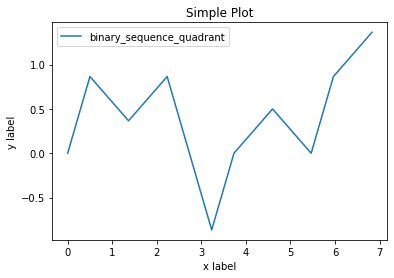

In [ ]:
## místo pro Váš kód
import matplotlib.pyplot as plt

x_nt2kvad, y_nt2kvad = nt2kvad('TGCAATCGTC')
fig, ax = plt.subplots()
ax.plot(x_nt2kvad, y_nt2kvad, label='binary_sequence_quadrant')

ax.set_xlabel('x label')  
ax.set_ylabel('y label') 
ax.set_title("Simple Plot")  
ax.legend() 
print('x = ', x_nt2kvad, '\ny = ', y_nt2kvad)


## <u>Úkol 4:</u> <br>

* Z NCBI z databáze Gene stáhněte gen COX3 pro 6 zadaných organismů (*Bos taurus, Canis lupus familiaris, Drosophila melanogaster, Octopus vulgaris, Pan troglodytes, Saccharomyces cerevisiae*) ve FASTA formátu.
* Pomocí funkce z úkolu 3 vypočtěte kumulované signály pomocí reprezentace 1. a 4. kvadrantu.
* Vykreslete signály pro jednotlivé organismy do jednoho grafu.  

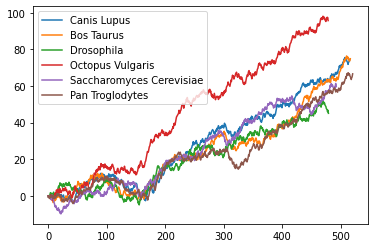

In [ ]:
## místo pro Váš kód
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt
import numpy as np
import math

seq_canis_lupus = SeqIO.read('canis_lupus.fasta', 'fasta').seq
seq_bos_taurus = SeqIO.read('bos_taurus.fasta', 'fasta').seq
seq_drosophila = SeqIO.read('drosophila.fasta', 'fasta').seq
seq_octopus = SeqIO.read('octopus.fasta', 'fasta').seq
seq_saccharomyces = SeqIO.read('saccharomyces.fasta', 'fasta').seq
seq_troglodytes = SeqIO.read('troglodytes.fasta', 'fasta').seq


x_canis_lupus, y_canis_lupus = nt2kvad(seq_canis_lupus)
x_bos_taurus, y_bos_taurus = nt2kvad(seq_bos_taurus)
x_drosophila, y_drosophila = nt2kvad(seq_drosophila)
x_octopus, y_octopus = nt2kvad(seq_octopus)
x_saccharomyces, y_saccharomyces = nt2kvad(seq_saccharomyces)
x_troglodytes, y_troglodytes = nt2kvad(seq_troglodytes)

fig, ax = plt.subplots()

ax.plot(x_canis_lupus, y_canis_lupus, label = 'Canis Lupus')
ax.plot(x_bos_taurus, y_bos_taurus, label = 'Bos Taurus')
ax.plot(x_drosophila, y_drosophila, label = 'Drosophila')
ax.plot(x_octopus, y_octopus, label = 'Octopus Vulgaris')
ax.plot(x_saccharomyces, y_saccharomyces, label = 'Saccharomyces Cerevisiae')
ax.plot(x_troglodytes, y_troglodytes, label = 'Pan Troglodytes')

ax.legend()



